In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd
from sympy.polys.polyfuncs import horner

### Newton Interpolation

In [3]:
def coeffts(x_data, y_data):
    # n points
    n = len(x_data)  # degre n-1
    a = np.zeros((n, n))
    a[:, 0] = y_data.copy()
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            a[i, j] = (a[i, j-1]-a[i-1, j-1])/(x_data[i]-x_data[i-j])
    return a

In [4]:
def nested_newton(x, a, x_data):
    n = len(x_data) - 1
    p = a[n]
    for k in range(1, n+1):
        p = a[n-k] + (x - x_data[n-k])*p
    return p

### Table

In [5]:
x_data = np.array([-15, -13, -5, -1.0])
y_data = np.array([15, 13.0, 9, 4.0])
a = coeffts(x_data, y_data)
table = np.append(np.reshape(x_data, (len(x_data), 1)), a, axis=1)
df = pd.DataFrame(data=table, index=range(len(table[:,0])), columns=["x_k", "f[]", "f[;]" , "f[;;]", "f[;;;]"])
pd.set_option("display.precision", 7)
df

,x_k,f[],f[;],f[;;],f[;;;]
0,-15.0,15.0,0.00,0.0000,0.0000000
1,-13.0,13.0,-1.00,0.0000,0.0000000
2,-5.0,9.0,-0.50,0.0500,0.0000000
3,-1.0,4.0,-1.25,-0.0625,-0.0080357


### Polynomial

In [6]:
x = sp.symbols("x")
p = sp.N(nested_newton(x, np.diag(a), x_data), 8)
horner(p)

x*(x*(-0.0080357143*x - 0.21517857) - 2.2919643) + 1.9151786

### Plot

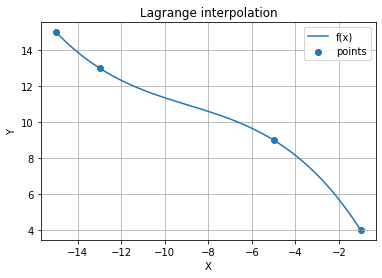

In [7]:
x_interval = np.linspace(np.min(x_data), np.max(x_data), 100)
y_interval = [p.subs(x, i) for i in x_interval]

plt.plot(x_interval, y_interval)
plt.scatter(x_data, y_data)
plt.grid(True)
plt.title("Lagrange interpolation")
plt.legend(("f(x)","points"))
plt.xlabel("X")
plt.ylabel("Y")
plt.show()